# 主成分分析(PCA)

len x: 1000
len y: 1000


<ipython-input-1-1b903eff5759>:9: RuntimeWarning: covariance is not positive-semidefinite.
  x, y = np.random.multivariate_normal(mean, cov, 1000).T


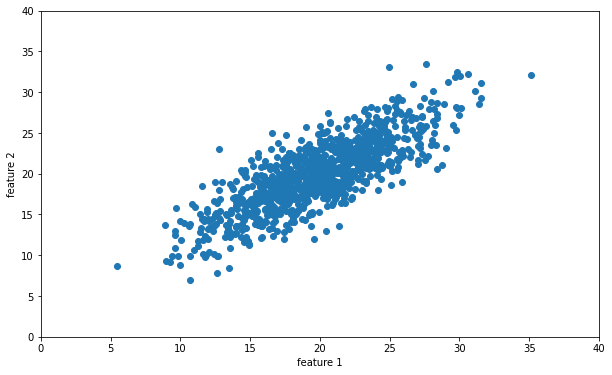

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

mean = [20, 20]
cov = [[5, 0], [25, 25]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

print('len x:', len(x))
print('len y:', len(y))

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [2]:
# 特徴ベクトルx,yを結合して単一の特徴行列Xを作成する
X = np.vstack((x, y)).T
X

array([[18.06702058, 17.74216352],
       [15.2431922 , 19.33738263],
       [21.30419006, 20.66344208],
       ...,
       [17.09887562, 19.96690425],
       [21.27072385, 18.92945428],
       [21.67216575, 19.68268369]])

主成分分析を計算する

In [3]:
import cv2

# PCAComputeの2番目の引数にnp.array([])を指定することで、OpenCVにデータから平均値を計算するように指示する。
# mu = 平均値、eig = 共分散行列の固有ベクトル
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.71481632,  0.69931225],
       [-0.69931225,  0.71481632]])

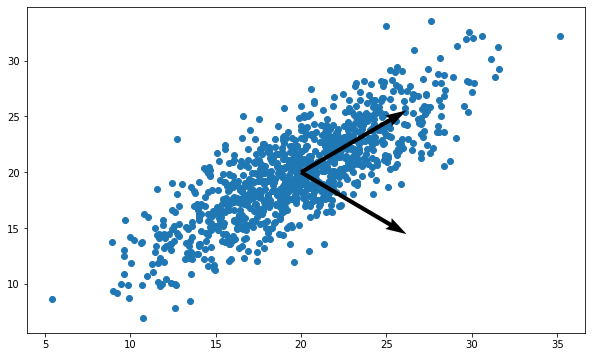

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[0, 0], 0.6 * eig[1, 0], zorder=3, scale=0.1, units='xy') # ベクトル場の可視化
plt.quiver(mean[0], mean[1], eig[0, 0], 0.6 * eig[0, 1], zorder=3, scale=0.1, units='xy') # ベクトル場の可視化
plt.show()